# [ CNN Fashion MNIST MODEL]

[1] 모듈 로딩 및 데이터 준비 <hr>

In [23]:
# 모듈 로딩

import torch										# Tensor 및 기본 함수들 관련 모듈
import torch.nn as nn								# 인공신경망 관련 모듈
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST				#  비전 관련 내장 데이터셋 모듈
from torch.utils.data import DataLoader

import torchvision.transforms as transforms

# 시각화
import matplotlib.pyplot as plt

In [24]:
# 이미지 관련 준비
IMG_ROOT = '../Data'


In [25]:
trainDS = FashionMNIST(root = IMG_ROOT, download=True, train=True, transform=transforms.ToTensor())
testDS = FashionMNIST(root = IMG_ROOT, download=True, train=False, transform=transforms.ToTensor())

In [26]:
# 데이터셋 체크
# - 타입
print(f'type {type(testDS)}'   )


print(f'test Ds class {testDS.classes}'   )
print(f'test ds class_id_idx {testDS.class_to_idx}'   )


type <class 'torchvision.datasets.mnist.FashionMNIST'>
test Ds class ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
test ds class_id_idx {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [27]:
# 속성 = 테이터 와 타겟

testDS.targets
testDS.data.shape

torch.Size([10000, 28, 28])

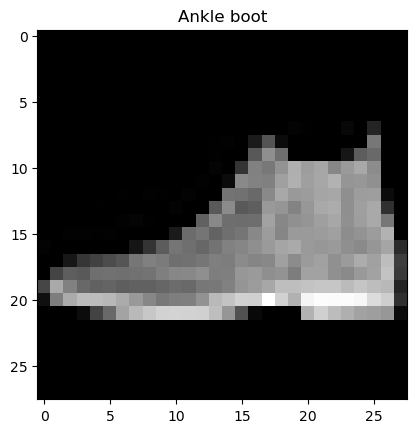

In [28]:
idx_to_classes =  {v:k for k, v in testDS.class_to_idx.items()}

plt.imshow(testDS.data[0], cmap='gray')
plt.title(idx_to_classes[testDS.targets[0].item()])
plt.show()

In [29]:
# 로우 데이터 확인
print({testDS.data[0].min()}, {testDS.data[0].max()})

{tensor(0, dtype=torch.uint8)} {tensor(255, dtype=torch.uint8)}


# [3]모델 정의 및 설계 <hr>

In [30]:
class FashinDNN(nn.Module):
	def __init__(self):
		super(FashinDNN, self).__init__()
		self.fc1 = nn.Linear(in_features=784, out_features=256)
		self.drop = nn.Dropout(0.25)
		self.fc2 = nn.Linear(in_features=256, out_features=128)
		self.fc3 = nn.Linear(in_features=128, out_features=10)


	def forward(self, input_Data):
		# 3D (BS,H,W) ==> 2D (BS, )
			
		out = input_Data.view(-1,784)
		out = F.relu(self.fc1(out))
		out = self.drop(out)
		out = F.relu(self.fc2(out))
		out = self.fc3(out)
		return out

In [ ]:
class FashionDNN(nn.Module):
    def __init__(self):
        super().__init__()
        # 특징 맵 추출 부분
        self.con_layer_1 = nn.Conv2d(1,1,3) # 1, , 28, 28 ==>  (1, 1,26, 26)
        self.pool_layer1 = nn.MaxPool2d(2,2) # 1, 1, 26, 26 ==> (1, 1, 13, 13) 가장 앞1: 이미지 사이즈
        self.flat_layer = nn.Faltten()        # 1, 13, 13 ==> (1, 1*13*13)
        
        # 전결합 학습 부분
        self.fc_layer1 = nn.Linear(169 , 30)
        self.out_layer = nn.Linear(30 ,10)

In [31]:
from torchinfo import summary 
m1 = FashinDNN()

summary(m1, input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
FashinDNN                                [1, 10]                   --
├─Linear: 1-1                            [1, 256]                  200,960
├─Dropout: 1-2                           [1, 256]                  --
├─Linear: 1-3                            [1, 128]                  32,896
├─Linear: 1-4                            [1, 10]                   1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
Total mult-adds (M): 0.24
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.94
Estimated Total Size (MB): 0.95

In [32]:
trainDS.data[0].shape , trainDS.data[0:3].shape

(torch.Size([28, 28]), torch.Size([3, 28, 28]))

In [45]:

train_img = trainDS.data[0:2].float()
pre = m1(train_img).argmax()
pre, trainDS.targets[0]

(tensor(15), tensor(9))

In [46]:
for img, target in trainDS:
	print(img.shape, target.shape)

AttributeError: 'int' object has no attribute 'shape'

In [47]:
class FashinCNN (nn.Module):
	def __init__(self):
		super(FashinCNN, self).__init__()
		self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
							  nn.BatchNorm2d(32),
							  nn.ReLU(),
							  nn.MaxPool2d(kernel_size=2, stride=2)
							  ) 
		self.layer2 = nn.Sequential(
			nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
			nn.BatchNorm2d(64),
			nn.ReLU(),
			nn.MaxPool2d(2)
		)

		self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
		self.drop = nn.Dropout2d(0.25),
		self.fc2 = nn.Linear(in_features=600, out_features=120)
		self.fc3 = nn.Linear(in_features=120, out_features=10)
	def forward(self, x):
		print(f'data shape : {x.shape}')
		out = self.layer1(x)
		print(f'data shape : {out.shape}')
		out = self.layer2(out)
		print(f'data shape : {out.shape}')
		out = out.view(out.size(0),-1)
		out = self.fc1(out)
		print(f'data shape : {out.shape}')
		out = self.drop(out)
		print(f'data shape : {out.shape}')
		out = self.fc2(out)
		print(f'data shape : {out.shape}')
		out = self.fc3(out)

		return out


In [ ]:
# CNN MODEL ===============================================
# 클래스 이름 : FashionCNN
# 부모 클래스 : nn.Module
# 모델 구현법 : 지도학습 + 다중 분류
# 모델층 구성
# 특징 추출 입력 이미지 주요 특징 추출한 특징 맵 FeatutreMap
# 				이미지체널/커널수 	출력체널/커널수		활성화 함수  커널크기
# 		

In [ ]:
m1 = FashinCNN()


# [4] 학습준비 <hr>

In [36]:
# 학습 관련 설정 

EPOCHS = 10
BATCH_SIZE = 100
T_ITERATION = int(trainDS.data.shape[0]/BATCH_SIZE)

LR = 0.001
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'

print(f'epochs {EPOCHS}, batch_size {BATCH_SIZE}, t_interation {T_ITERATION}')


epochs 10, batch_size 100, t_interation 600


# 학습

In [37]:
# 

model = FashinDNN()
model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
print(model)



FashinDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [38]:
import torch.utils
import torch.utils.data


train_loader = torch.utils.data.DataLoader(trainDS, batch_size=100)
test_loader = torch.utils.data.DataLoader(testDS,batch_size=100)

In [39]:
num_epochs = 5
count = 0

loss_list =[]
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []


for epoch in range(num_epochs):
	for images, labels in train_loder:
		

IndentationError: expected an indented block (2580218972.py, line 14)